<a href="https://colab.research.google.com/github/ahmadhajmosa/deap/blob/master/NS_arch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!git clone https://github.com/titu1994/neural-architecture-search.git

In [0]:
%cd neural-architecture-search/
from controller import Controller, StateSpace


[Errno 2] No such file or directory: 'neural-architecture-search/'
/content


ModuleNotFoundError: ignored

TODOS:

1.   check why P(Target|Rule) did not work our for label 2 type material

2.   try gentic programming using all rules together




In [0]:
import pandas as pd
import numpy as np
columns = ['Ship_to','Material','Incoterm','Buyer', 'ID']

unique_values = dict() 
unique_values['Ship_to'] = ['AT','DE','IT','ES','NL']
unique_values['Material'] = ['1','0']
unique_values['Buyer'] = ['AT','DE','IT','ES','NL']
unique_values['Incoterm'] = ['1','0']
unique_values['ID'] = ['11','21','31','42','53','64','75']
#####
#####
def rules(df):
    if (df['Ship_to'] == 'AT') and (df['Material'] == '1'):
        return 'A1',0
    if (df['Ship_to'] == 'AT') and (df['Material'] == '0'):
        return 'A0',1
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] == df['Buyer']):
        return 'A0',2
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='0'):
        return 'A0',3   
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='1'):
        return 'A1',4                 
    else:
        return 'A0',5

##################
# Generate data
##################     
rows=[]
labels = []    
for i in range(10000):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    sr['Tx'] = tr
    sr['labels'] = g
    #if(sr['Tx'] == 'A0'):
    #    sr['ID'] = '11'

    labels.append(g)
    sr['Anomaly'] = False
    sr['Anomaly Position'] = 'N/A'

    rows.append(sr)  

for i in range(10):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    if(tr == 'A0'):
        tr = 'A1'
    else:
        tr = 'A0'
    sr['Tx'] = tr
    sr['labels'] = g

    labels.append(g)
    sr['Anomaly'] = True
    sr['Anomaly Position'] = 'Tx'

    rows.append(sr)  
for i in range(10):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    if(sr['Ship_to'] == 'AT'):
        sr['Ship_to'] = 'DE'
    else:
        sr['Ship_to'] = 'AT'
    sr['Tx'] = tr
    sr['labels'] = g

    labels.append(g)
    sr['Anomaly'] = False
    sr['Anomaly Position'] = 'Ship_to'

    rows.append(sr)      
pd_data = pd.DataFrame(rows) 


In [2]:
max_col = 4
max_un = 3
max_cluster = 3
max_rules = 4
max_terms = 5

term_to_ind = dict()
ind_to_term = dict()

rl_ind = 0
for cat in range(5):
    if cat == 0:
        for col in pd_data.columns[:-4]:
            for un in pd_data[col].unique():
                term_to_ind['{} == "{}"'.format(col,un)] = rl_ind
                ind_to_term[rl_ind] = '{} == "{}"'.format(col,un)
                rl_ind+=1
    elif cat == 1:
        for col in pd_data.columns[:-4]:
            for un in pd_data[col].unique():
                term_to_ind['{} != "{}"'.format(col,un)] = rl_ind
                ind_to_term[rl_ind] = '{} != "{}"'.format(col,un)
                rl_ind+=1        
    elif cat == 3:
        for col_1 in pd_data.columns[:-4]:
            for col_2 in pd_data.columns[:-4]:
                if col_1 != col_2:
                    term_to_ind['{}= {}'.format(col_1,col_2)] = rl_ind
                    ind_to_term[rl_ind] = '{} == {}'.format(col_1,col_2)
                    rl_ind+=1   
    elif cat == 4:
        for col_1 in pd_data.columns[:-4]:
            for col_2 in pd_data.columns[:-4]:
                if col_1 != col_2:

                    term_to_ind['{} != {}'.format(col_1,col_2)] = rl_ind
                    ind_to_term[rl_ind] = '{} != "{}"'.format(col_1,col_2)
                    rl_ind+=1                 
ind_to_term            


{0: 'Ship_to == "IT"',
 1: 'Ship_to == "ES"',
 2: 'Ship_to == "NL"',
 3: 'Ship_to == "AT"',
 4: 'Ship_to == "DE"',
 5: 'Material == "1"',
 6: 'Material == "0"',
 7: 'Buyer == "AT"',
 8: 'Buyer == "DE"',
 9: 'Buyer == "IT"',
 10: 'Buyer == "ES"',
 11: 'Buyer == "NL"',
 12: 'Incoterm == "0"',
 13: 'Incoterm == "1"',
 14: 'ID == "64"',
 15: 'ID == "31"',
 16: 'ID == "75"',
 17: 'ID == "21"',
 18: 'ID == "42"',
 19: 'ID == "11"',
 20: 'ID == "53"',
 21: 'Ship_to != "IT"',
 22: 'Ship_to != "ES"',
 23: 'Ship_to != "NL"',
 24: 'Ship_to != "AT"',
 25: 'Ship_to != "DE"',
 26: 'Material != "1"',
 27: 'Material != "0"',
 28: 'Buyer != "AT"',
 29: 'Buyer != "DE"',
 30: 'Buyer != "IT"',
 31: 'Buyer != "ES"',
 32: 'Buyer != "NL"',
 33: 'Incoterm != "0"',
 34: 'Incoterm != "1"',
 35: 'ID != "64"',
 36: 'ID != "31"',
 37: 'ID != "75"',
 38: 'ID != "21"',
 39: 'ID != "42"',
 40: 'ID != "11"',
 41: 'ID != "53"',
 42: 'Ship_to == Material',
 43: 'Ship_to == Buyer',
 44: 'Ship_to == Incoterm',
 45: 'Ship_

In [0]:
from sklearn.metrics import log_loss
def test_implication(term_1,term_2): 
     # A->B: 
     # True True True
     pred = np.zeros(len(pd_data)).astype(bool)
     actual = np.zeros(len(pd_data)).astype(bool)
     pred[pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).index] = True
     actual[pd_data.query('Tx == "A1"').index] = True
     c_1 = np.equal(pred,actual)
     c_1 = np.sum(c_1)/len(c_1)
     # False True True
     pred = np.ones(len(pd_data)).astype(bool)
     actual = np.zeros(len(pd_data)).astype(bool)
     pred[pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).index] = False
     actual[pd_data.query('Tx == "A1"').index] = True
     c_2 = np.equal(pred,actual)
     c_2 = np.sum(c_2)/len(c_2)
     # True False False
     pred = np.ones(len(pd_data)).astype(bool)
     actual = np.zeros(len(pd_data)).astype(bool)
     pred[pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).index] = True
     actual[pd_data.query('Tx != "A1"').index] = True
     c_3 = np.equal(pred,actual)
     c_3 = np.sum(c_3)/len(c_3)



     return c_1, c_2, c_3
def cross_entropy(term_1,term_2):
     pred = np.zeros(len(pd_data)).astype(bool)
     actual = np.zeros(len(pd_data)).astype(bool)
     pred[pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).index] = True
     actual[pd_data.query('Tx == "A1"').index] = True

     return log_loss(actual,pd.get_dummies(pred).values)
def evaluate_rule(term_1,term_2):
    temp_df = pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule)
    temp_df_3 = pd_data.query('Tx == "A1"').shape[0]/pd_data.shape[0] # P(Target)
    temp_df_2 = pd_data.query('{} and {} and Tx == "A1"'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule,Target)
    if ( (temp_df_3 == 0) or (temp_df == 0)):
        acc = 0
        a1 = 0
        a2 = 0
    
    else:
        a2 = temp_df_2/temp_df_3 # P(Rule,Target)/P(Target) = P(Rule|Target)
        a1 = temp_df_2/temp_df # P(Rule,Target)/P(Rule) = P(Target|Rule)
        acc = (a1+a2)/2
    reward = (acc - 0)
    reward = np.clip(reward, -0.05, 0.05)
    crossE = cross_entropy(term_1,term_2)
    c_1,c_2,c_3 = test_implication(term_1,term_2)

    return acc,a1,a2,temp_df_2, crossE, c_1,c_2,c_3
          

In [0]:

t = TicToc()
t.tic()
rules_dict = dict()
for i in range(rl_ind):
    for j in range(rl_ind):
        if (i != j):
            acc,a1,a2,temp_df_2,crossE, c_1,c_2,c_3 = evaluate_rule(i,j)
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])] = dict()
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['reward'] = acc
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['P(Target|Rule)'] = a1
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['P(Rule|Target)'] = a2
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['P(Rule,Target)'] = temp_df_2
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['crossE'] = crossE
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['T-T-T'] = c_1
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['F-T-T'] = c_2
            rules_dict['{} and {}'.format(ind_to_term[i],ind_to_term[j])]['T-F-T'] = c_3
t.tic()
  

In [4]:
result = pd.DataFrame.from_dict(rules_dict).T
#result[result["P(Rule,Target)"] ==result["P(Rule,Target)"].min(axis=0)]

NameError: ignored

In [0]:
result[result["P(Target|Rule)"] ==result["P(Target|Rule)"].max(axis=0)]

,F-T-T,"P(Rule,Target)",P(Rule|Target),P(Target|Rule),T-F-T,T-T-T,crossE,reward
"Ship_to == ""AT"" and Material == ""1""",0.317465,0.096607,0.233365,0.998968,0.586028,0.682535,10.964855,0.616167
"Ship_to == ""AT"" and Material != ""0""",0.317465,0.096607,0.233365,0.998968,0.586028,0.682535,10.964855,0.616167
"Material == ""1"" and Ship_to == ""AT""",0.317465,0.096607,0.233365,0.998968,0.586028,0.682535,10.964855,0.616167
"Material != ""0"" and Ship_to == ""AT""",0.317465,0.096607,0.233365,0.998968,0.586028,0.682535,10.964855,0.616167


In [0]:
result.loc['Ship_to == "AT" and Material == "1"']
list_ind = np.arange(0,rl_ind).tolist()


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81]

In [12]:
#!pip install pytictoc
#from pytictoc import TicToc

#t = TicToc()
#t.tic()
def random_pop(popsize):
    list_ind = np.arange(0,rl_ind).tolist()
    pop = []
    pop_ind = []
    for i in range(popsize):
        term_1 = np.random.choice(list_ind)
        list_ind.remove(term_1)
        term_2 = np.random.choice(list_ind)
        list_ind.remove(term_2)

        rule = '{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])
        pop.append(rule)
        pop_ind.append([term_1,term_2])
    return pop, pop_ind
pop_size = 20
pop, pop_ind = random_pop(pop_size)


def crossover(rule_1,rule_2):
    child_term_1 = np.random.choice(rule_1)
    child_term_2 = np.random.choice(rule_2)

    child_ind = [child_term_1, child_term_2]
    child_rule = '{} and {}'.format(ind_to_term[child_term_1],ind_to_term[child_term_2])
    return child_rule, child_ind


print('parent 1', pop[0])    
print('parent 2', pop[1])    

child_rule, child_ind = crossover(pop_ind[0],pop_ind[1])

print('child', child_rule)    

def evaluate_rule(terms):
    term_1,term_2 = terms
    temp_df = pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule)
    temp_df_3 = pd_data.query('labels == "2"').shape[0]/pd_data.shape[0] # P(Target)
    temp_df_2 = pd_data.query('{} and {} and labels == "2"'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule,Target)
    if ( (temp_df_3 == 0) or (temp_df == 0)):
        acc = 0
        a1 = 0
        a2 = 0
    
    else:
        a2 = temp_df_2/temp_df_3 # P(Rule,Target)/P(Target) = P(Rule|Target)
        a1 = temp_df_2/temp_df # P(Rule,Target)/P(Rule) = P(Target|Rule)
        acc = (a1+a2)/2
    reward = (acc - 0)
    reward = np.clip(reward, -0.05, 0.05)
    crossE = cross_entropy(term_1,term_2)
    c_1,c_2,c_3 = test_implication(term_1,term_2)

    return a1
best_child_fitness = 0
elite = []
for i in range(100):
    #print('popsize',len(pop))
    rules_fitness = []
    for rule_i,rule in enumerate(pop):
        f = evaluate_rule(pop_ind[rule_i])
        rules_fitness.append(f)
    sorted_f = np.argsort(rules_fitness)
    child_rule, child_ind = crossover(pop_ind[sorted_f[-1]],pop_ind[sorted_f[-2]])
    child_2_rule, child_2_ind = crossover(pop_ind[sorted_f[-3]],pop_ind[sorted_f[-4]])

    pop, pop_ind = random_pop(pop_size)

    if evaluate_rule(child_ind) > best_child_fitness:
        if evaluate_rule(child_ind)<0.99:
            print(child_rule, evaluate_rule(child_ind))
            best_child_fitness = evaluate_rule(child_ind)
            pop.append(child_rule)
            pop_ind.append(child_ind)
            pop.append(child_2_rule)
            pop_ind.append(child_2_ind)
        else:
            elite.append(child_rule)
            print('ELITE: ',  child_rule)


elite

#t.toc()

parent 1 Ship_to == ID and Ship_to != "ES"
parent 2 ID == "21" and ID == "75"
child Ship_to == ID and ID == "75"
Ship_to == "ES" and Ship_to != "Incoterm" 0.21044921875
Buyer == Ship_to and ID != "Buyer" 0.8125915080527087
Ship_to == Buyer and ID != "42" 0.8147720715522216
ELITE:  Buyer != "AT" and Ship_to == Buyer
Buyer == Ship_to and ID == "53" 0.8666666666666666
ELITE:  Buyer == Ship_to and Buyer == "NL"
ELITE:  Buyer == Ship_to and Ship_to == "DE"
ELITE:  Buyer == "ES" and Ship_to == Buyer
ELITE:  Buyer == Ship_to and Ship_to == "ES"
ELITE:  Buyer == Ship_to and Buyer == "NL"
ELITE:  Buyer == Ship_to and Buyer == "DE"
ELITE:  Buyer == Ship_to and Ship_to != "AT"


['Buyer != "AT" and Ship_to == Buyer',
 'Buyer == Ship_to and Buyer == "NL"',
 'Buyer == Ship_to and Ship_to == "DE"',
 'Buyer == "ES" and Ship_to == Buyer',
 'Buyer == Ship_to and Ship_to == "ES"',
 'Buyer == Ship_to and Buyer == "NL"',
 'Buyer == Ship_to and Buyer == "DE"',
 'Buyer == Ship_to and Ship_to != "AT"']

In [8]:
pd_data.query('Buyer == "IT" and Buyer == Ship_to')

,Ship_to,Material,Buyer,Incoterm,ID,Tx,labels,Anomaly,Anomaly Position
2,IT,1,IT,1,75,A0,2,False,N/A
36,IT,1,IT,0,64,A0,2,False,N/A
51,IT,1,IT,0,21,A0,2,False,N/A
86,IT,1,IT,0,21,A0,2,False,N/A
107,IT,0,IT,0,53,A0,2,False,N/A
131,IT,0,IT,1,53,A0,2,False,N/A
163,IT,1,IT,0,53,A0,2,False,N/A
181,IT,0,IT,1,53,A0,2,False,N/A
202,IT,0,IT,0,42,A0,2,False,N/A
204,IT,1,IT,0,21,A0,2,False,N/A


In [0]:
np.argsort(rules_fitness)

array([1, 2, 4, 5, 6, 8, 9, 3, 7, 0])

In [0]:
temp_df = pd_data.query('ID == "53" and Ship_to != "DE"').shape[0]/pd_data.shape[0]
temp_df_3 = pd_data.query('Tx == "A1"').shape[0]/pd_data.shape[0]

temp_df_2 = pd_data.query('ID == "53" and Ship_to != "DE" and Tx == "A1"').shape[0]/pd_data.shape[0]
#temp_df = pd_data.query('Ship_to == "AT" and Material == "1"')

a1 = temp_df_2/temp_df
a2 = temp_df_2/temp_df_3

print(a1,a2)


0.9942748091603053 0.1243436754176611


In [0]:
temp_df = pd_data.query('Material == "1" and Ship_to == "AT"').shape[0]/pd_data.shape[0]
temp_df_3 = pd_data.query('Tx == "A1"').shape[0]/pd_data.shape[0]

temp_df_2 = pd_data.query('Material == "1" and Ship_to == "AT" and Tx == "A1"').shape[0]/pd_data.shape[0]
#temp_df = pd_data.query('Ship_to == "AT" and Material == "1"')

a1 = temp_df_2/temp_df
a2 = temp_df_2/temp_df_3

print(a1,a2)


0.9980295566502464 0.24176610978520288


In [0]:
pd_data.query('{} and {} and Tx == "A1"'.format(ind_to_term[0],ind_to_term[60])).shape[0]/pd_data.shape[0]
#temp_df = pd_data.query('Ship_to == "AT" and Material == "1"')

0.0753493013972056

In [0]:
import numpy as np
import csv


import tensorflow as tf
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import to_categorical

from controller import Controller, StateSpace
from manager import NetworkManager
from model import model_fn

from keras.models import Model
from keras.layers import Input, Dense, Conv2D, GlobalAveragePooling2D

# generic model design
def model_fn(actions):
    # unpack the actions from the list
    term_1, term_2 = actions

    temp_df = pd_data.query('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule)
    temp_df_3 = pd_data.query('Tx == "A1"').shape[0]/pd_data.shape[0] # P(Target)
    temp_df_2 = pd_data.query('{} and {} and Tx == "A1"'.format(ind_to_term[term_1],ind_to_term[term_2])).shape[0]/pd_data.shape[0] # P(Rule,Target)
    if ( (temp_df_3 == 0) or (temp_df == 0)):
        acc = 0
        a1 = 0
        a2 = 0
    
    else:
        a2 = temp_df_2/temp_df_3 # P(Rule,Target)/P(Target) = P(Rule|Target)
        a1 = temp_df_2/temp_df # P(Rule,Target)/P(Rule) = P(Target|Rule)
        acc = (a1+a2)/2
    reward = (acc - 0)
    reward = np.clip(reward, -0.05, 0.05)
    crossE = cross_entropy(term_1,term_2)
    c_1,c_2,c_3 = test_implication(term_1,term_2)
    print('{} and {}'.format(ind_to_term[term_1],ind_to_term[term_2]))

    return acc,a1,a2,temp_df_2, crossE, c_1,c_2,c_3



In [0]:

# create a shared session between Keras and Tensorflow
policy_sess = tf.Session()
K.set_session(policy_sess)

NUM_LAYERS = 1  # number of layers of the state space
MAX_TRIALS = 250  # maximum number of models generated

MAX_EPOCHS = 10000  # maximum number of epochs to train
CHILD_BATCHSIZE = 128  # batchsize of the child models
EXPLORATION = 0.8  # high exploration for the first 1000 steps
REGULARIZATION = 1e-3  # regularization strength
CONTROLLER_CELLS = 32  # number of cells in RNN controller
EMBEDDING_DIM = 20  # dimension of the embeddings for each state
ACCURACY_BETA = 0.8  # beta value for the moving average of the accuracy
CLIP_REWARDS = 0.0  # clip rewards in the [-0.05, 0.05] range
RESTORE_CONTROLLER = False  # restore controller to continue training

# construct a state space
state_space = StateSpace()

# add states
state_space.add_state(name='term_1', values = np.arange(0,rl_ind).tolist())
state_space.add_state(name='term_2', values = np.arange(0,rl_ind).tolist())

# print the state space being searched
state_space.print_state_space()

# prepare the training data for the NetworkManager
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

dataset = [x_train, y_train, x_test, y_test]  # pack the dataset for the NetworkManager

previous_acc = 0.0
total_reward = 0.0

with policy_sess.as_default():
    # create the Controller and build the internal policy network
    controller = Controller(policy_sess, NUM_LAYERS, state_space,
                            reg_param=REGULARIZATION,
                            exploration=EXPLORATION,
                            controller_cells=CONTROLLER_CELLS,
                            embedding_dim=EMBEDDING_DIM,
                            restore_controller=False)

# create the Network Manager


# get an initial random state space if controller needs to predict an
# action from the initial state
state = state_space.get_random_state_space(NUM_LAYERS)
print("Initial Random State : ", state_space.parse_state_space_list(state))
print()

# clear the previous files
controller.remove_files()

# train for number of trails
for trial in range(MAX_TRIALS):
    with policy_sess.as_default():
        K.set_session(policy_sess)
        actions = controller.get_action(state)  # get an action for the previous state
        #print('actions',actions)
    # print the action probabilities
    state_space.print_actions(actions)
    #print("Predicted actions : ", state_space.parse_state_space_list(actions))

    # build a model, train and get reward and accuracy from the network manager
    acc,reward,a2,temp_df_2, crossE, c_1,c_2,c_3 = model_fn(state_space.parse_state_space_list(actions))
    print("Rewards : ", reward)

    with policy_sess.as_default():
        K.set_session(policy_sess)

        total_reward += reward
        print("Total reward : ", total_reward)

        # actions and states are equivalent, save the state and reward
        state = actions
        controller.store_rollout(state, reward)

        # train the controller on the saved state and the discounted rewards
        loss = controller.train_step()
        print("Trial %d: Controller loss : %0.6f" % (trial + 1, loss))


    print()

print("Total Reward : ", total_reward)

**************************************** STATE SPACE ****************************************
{ 'id': 0,
  'index_map_': { 0: 0,
                  1: 1,
                  2: 2,
                  3: 3,
                  4: 4,
                  5: 5,
                  6: 6,
                  7: 7,
                  8: 8,
                  9: 9,
                  10: 10,
                  11: 11,
                  12: 12,
                  13: 13,
                  14: 14,
                  15: 15,
                  16: 16,
                  17: 17,
                  18: 18,
                  19: 19,
                  20: 20,
                  21: 21,
                  22: 22,
                  23: 23,
                  24: 24,
                  25: 25,
                  26: 26,
                  27: 27,
                  28: 28,
                  29: 29,
                  30: 30,
                  31: 31,
                  32: 32,
                  33: 33,
                  34: 34,
     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


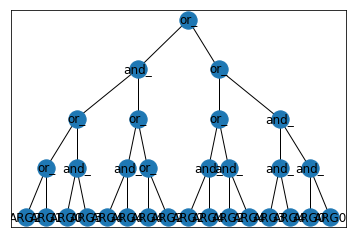

In [0]:
!pip install -q pydot
!pip install deap
!apt-get install -y graphviz-dev



!pip install pygraphviz
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
from deap import base, creator, gp
import operator
n_col=5
pset = gp.PrimitiveSet("MAIN", n_col)
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
#pset.addPrimitive(operator.not_, 1)


creator.create("Individual", gp.PrimitiveTree)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=10)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)

expr = toolbox.individual()
nodes, edges, labels = gp.graph(expr)

### Graphviz Section ###
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

### Graphviz Section ###
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

unique_values = dict()
for col in range(n_col):
    n_uniq = np.random.randint(2, max_un)
    unique_values[columns[col]] = []
    for un in range(n_uniq):
                unique_values[columns[col]].append("un{}".format(un))
rows = []
for i in range(100):
            # Ship from

     row = dict()

     for key, val in unique_values.items():
                row[key] = val[np.random.randint(len(val))]

     #sr = pd.Series(row)
     #tr,rules_oc_dict = rules_gen(sr,rules_oc_dict)
     #sr['A'] = tr
     #rows.append(sr)

    

In [0]:
0import pandas as pd
import numpy as np
columns = ['Ship_to','Material','Incoterm','Buyer']

unique_values = dict() 
unique_values['Ship_to'] = ['AT','DE','IT','ES','NL']
unique_values['Material'] = ['1','0']
unique_values['Buyer'] = ['AT','DE','IT','ES','NL']
unique_values['Incoterm'] = ['1','0']
unique_values['ID'] = ['11','21','31','42','53','64','75']
#####
#####
def rules(df):
    if (df['Ship_to'] == 'AT') and (df['Material'] == '1'):
        return 'A1',0
    if (df['Ship_to'] == 'AT') and (df['Material'] == '0'):
        return 'A0',1
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] == df['Buyer']):
        return 'A0',2
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='0'):
        return 'A0',3   
    if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='1'):
        return 'A1',4                 
    else:
        return 'A0',5

##################
# Generate data
##################     
rows=[]
labels = []    
for i in range(10000):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    sr['Tx'] = tr
    sr['labels'] = g
    if(sr['Tx'] == 'A0'):
        sr['ID'] = '11'

    labels.append(g)
    sr['ANOMALY'] = False
    sr['ANOMALYLOCATION'] = 'N/A'


    rows.append(sr)  

for i in range(10):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    if(tr == 'A0'):
        tr = 'A1'
    else:
        tr = 'A0'
    sr['Tx'] = tr
    sr['labels'] = g

    labels.append(g)
    sr['ANOMALY'] = True
    sr['ANOMALYLOCATION'] = 'Tx'


    rows.append(sr)  
for i in range(10):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    if(sr['Ship_to'] == 'AT'):
        sr['Ship_to'] = 'DE'
    else:
        sr['Ship_to'] = 'AT'
    sr['Tx'] = tr
    sr['labels'] = g

    labels.append(g)
    sr['ANOMALY'] = True
    sr['ANOMALYLOCATION'] = 'Ship_to'

    rows.append(sr)      
org_data = pd.DataFrame(rows) 
#dum = pd.get_dummies(org_data)
#dum
org_data= pd.sample(org_data,1)
org_data.to_csv('dummy_data_labeld.csv',sep=';', index=False)

SyntaxError: ignored

In [0]:
org_data= org_data.sample(frac=1)
org_data.to_csv('dummy_data_labeld.csv',sep=';', index=False)

In [0]:
columns = ['Ship_to','Material','Incoterm','Buyer']

unique_values = dict() 
unique_values['Ship_to'] = ['AT','DE','CZ','CH', 'NL']
unique_values['Material'] = ['1','0']
unique_values['Buyer'] = ['AT','DE','CZ','CH', 'NL']
unique_values['Incoterm'] = ['1','0']
label_ind=dict()
ind_label = dict()
label_ind['Ship_to == AT'] = 1
ind_label[1] = 'Ship_to == AT'
edges = []
indx = 1
sel_col = columns[1:]
for ro_i,i in enumerate(ro_ind[1:]):
    if ro_i==0:
        label_ind[term[ro_ind[ro_i+1-1]]] = indx
        ind_label[indx] = term[ro_ind[ro_i+1-1]]
    for term in list_of_terms[i:]:
        # case 1 == 
        #for un in unique_values[col]:
            label_ind[term] = indx
            ind_label[indx] = term
            edges.append((ro_ind[ro_i+1-1],indx))
            indx+=1

In [0]:
import networkx as nx
import random


def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)



import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(550,50))
G=nx.Graph()
G.add_edges_from(edges)
pos = hierarchy_pos(G,1)    
nx.draw(G, pos=pos, labels=ind_label)
plt.savefig('hierarchy.png')
#root = next(iter(nx.topological_sort(G))) 
#root

In [0]:
list_of_terms = []
ro_ind =[]
indx=0
for col in org_data.columns[:-1]:
    ro_ind.append(indx)
    for un in org_data[col].unique():
        list_of_terms.append('{} == "{}"'.format(col,un))
        indx+=1

columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    ro_ind.append(indx)

    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} == {}'.format(col,col_2))
            indx+=1

    columns = columns[1:]
columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    ro_ind.append(indx)

    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} != {}'.format(col,col_2))
            indx+=1

    columns = columns[1:]    
list_of_terms 

In [0]:
ro_ind

In [0]:
def evaluate_term(pred_po,pred_ng,actul_po,actul_ng):
    TP = len([i for i in pred_po if i in actul_po])
    TN = len([i for i in pred_ng if i in actul_ng])
    FP = len([i for i in pred_po if i in actul_ng])
    FN = len([i for i in pred_ng if i in actul_po])
    if (TP + TN + FP + FN) > 0:
        acc = (TP +TN) / (TP + TN + FP + FN)
    else:
        acc = 0
    if (TP + FP) > 0:
        precision = (TP) / (TP + FP)
    else:
        precision = 0
    if (TP + FN) > 0 :
        recall = (TP) / (TP + FN)
    else:
        recall = 0
    if (precision + recall) > 0:
        F1_score = F1 = 2 * (precision * recall) / (precision + recall)
    else:
        F1_score = 0
    return acc, precision, recall, F1_score




In [0]:
list_of_terms

In [0]:
%matplotlib inline
list_of_terms = []
for col in org_data.columns[:-1]:
    for un in org_data[col].unique():
        list_of_terms.append('{} == "{}"'.format(col,un))
columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} == {}'.format(col,col_2))
    columns = columns[1:]
columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} != {}'.format(col,col_2))
    columns = columns[1:]    
list_of_terms  

#data.groupby(['Ship_to'])['Tx'].unique()
max_depth = 4
re_data = org_data.copy()
target = 2
recalls = []
plt.figure(figsize=(5,5))



for i in range(max_depth):
    freq = dict()
    ind_to_term = dict()
    freq_list = []
    index_k= 0
    freq_col = dict()
    print('#########################################')
    for term in list_of_terms:
        if 1:
            #fre = re_data.query('labels == "0"').shape[0]/ re_data.query('{} and labels == 0'.format(term)).shape[0]
            #fre = re_data.query('{} and labels == 0'.format(term)).shape[0]/re_data.query('{}'.format(term)).shape[0]
            pred_po = re_data.query('{}'.format(term)).index
            #if pred_po.shape[0] == re_data.shape[0]:
             #   print('term','100')
                #continue
            if '==' in term:
                pred_ng = re_data.query('{}'.format(term.replace('==','!='))).index 
            else:
                 #print(term.replace('!=','=='),'che')
                 pred_ng = re_data.query('{}'.format(term.replace('!=','=='))).index 
               
            actul_po = re_data.query('labels == {}'.format(target)).index
            actul_ng = re_data.query('labels != {}'.format(target)).index  
            acc, prec, rec, F1_score = evaluate_term(pred_po,pred_ng,actul_po,actul_ng)           
            #print(term, rec,prec)
            freq[term] = index_k
            ind_to_term[index_k] = term

            freq_list.append(prec)
            index_k+=1
            #if rec < 1.0:
            #    break
        else:
            continue
    #ft = np.argmax(freq_list) 
    if np.max(freq_list) <=0.0:
       break    
    ft_all = np.argwhere(freq_list == np.max(freq_list)).tolist()
    ft_sorted = np.argsort(freq_list).tolist()
    ft_sorted_v = np.sort(freq_list).tolist()

    sn = sns.barplot(x=list(freq.keys()), y=freq_list)   
    sn.set_xticklabels(sn.get_xticklabels(), rotation=90)

    display(sn)

    recalls.append(np.max(freq_list))
    #print('np.max(freq_list)',np.max(freq_list))
    sel_col = []
    for ftp in ft_all:
        ft = ftp[0]
        # if ind_to_term[ft] == 'Ship_to == "NL"':
        #     #print('ddd')
        #     continue
        # if ind_to_term[ft] == 'Buyer == "NL"':
        #     #print('ddd')
        #     continue            
        #if ind_to_term[ft] == 'Material != Incoterm':
        #    ft = ft_sorted[-7]
        #    print('sorted',ind_to_term[ft] )
        # if '==' in ind_to_term[ft]:
        #     if ind_to_term[ft].split('==')[0] in sel_col:
        #         continue
        #     else:
        #         sel_col.append(ind_to_term[ft].split('==')[0])
        # if '!=' in ind_to_term[ft]:
        #     if ind_to_term[ft].split('!=')[0] in sel_col:
        #         continue
        #     else:
                #sel_col.append(ind_to_term[ft].split('!=')[0])        
        print('selected', ind_to_term[ft], freq_list[ft], ft)

        fre =re_data.query('{}'.format(ind_to_term[ft]))

    #print('ind_to_term[ft]')

        re_data = fre.copy()
        list_of_terms.remove(ind_to_term[ft])
        #print(list_of_terms)
recalls    

In [0]:
list_of_terms

In [0]:
ft 

In [0]:
freq

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [0]:
freq


In [0]:
list(freq.keys())

In [0]:
def get_rewards(list_of_terms):
        #data.groupby(['Ship_to'])['Tx'].unique()
        max_depth = 4
        re_data = org_data.copy()
        target = 0
        recalls = []



        for i in range(max_depth):
            freq = dict()
            ind_to_term = dict()
            freq_list = []
            index_k= 0
            freq_col = dict()

            for term in list_of_terms:
                if term != ' ':
                    #fre = re_data.query('labels == "0"').shape[0]/ re_data.query('{} and labels == 0'.format(term)).shape[0]
                    #fre = re_data.query('{} and labels == 0'.format(term)).shape[0]/re_data.query('{}'.format(term)).shape[0]
                    pred_po = re_data.query('{}'.format(term)).index
                    if pred_po.shape[0] == re_data.shape[0]:
                        continue
                    if '==' in term:
                        pred_ng = re_data.query('{}'.format(term.replace('==','!='))).index 
                    else:
                        #print(term.replace('!=','=='),'che')
                        pred_ng = re_data.query('{}'.format(term.replace('!=','=='))).index 
                    
                    actul_po = re_data.query('labels == {}'.format(target)).index
                    actul_ng = re_data.query('labels != {}'.format(target)).index  
                    acc, prec, rec = evaluate_term(pred_po,pred_ng,actul_po,actul_ng)           
                    #print(term, prec)
                    freq[term] = index_k
                    ind_to_term[index_k] = term

                    freq_list.append(rec)
                    index_k+=1
                    #if rec < 1.0:
                    #    break
                else:
                    continue
            #ft = np.argmax(freq_list) 
            if np.max(freq_list) <1:
                break    
            ft_all = np.argwhere(freq_list == np.max(freq_list)).tolist()
            recalls.append(np.max(freq_list))
            for ftp in ft_all:
                ft = ftp[0]
                print('selected', ind_to_term[ft], freq_list[ft], ft)
                fre =re_data.query('{}'.format(ind_to_term[ft]))

            #print('ind_to_term[ft]')

                re_data = fre.copy()
                list_of_terms.remove(ind_to_term[ft])
            #print(list_of_terms)
        recalls    

        clip_rewards = True

        beta = 0.8
        beta_bias = 0.8
        moving_acc = 0.0



        acc = np.mean(recalls)
        if moving_acc:
            if acc:
                reward = (acc - moving_acc)
            else:
                reward = 0
        else:
            reward = 0
            moving_acc = 0
            acc = 0

        # if rewards are clipped, clip them in the range -0.05 to 0.05
        if clip_rewards:
            reward = np.clip(reward, -0.05, 0.05)

        # update moving accuracy with bias correction for 1st update
        if beta > 0.0 and beta < 1.0:
            moving_acc = beta * moving_acc + (1 - beta) * acc
            moving_acc = moving_acc / (1 - beta_bias)
            beta_bias = 0

        reward = np.clip(reward, -0.1, 0.1)

        print()

        print("Manager: EWA Accuracy = ", moving_acc)

        return reward, acc


In [0]:
moving_acc

In [0]:
def evaluate_term(pred_po,pred_ng,actul_po,actul_ng):
    TP = len([i for i in pred_po if i in actul_po])
    TN = len([i for i in pred_ng if i in actul_ng])
    FP = len([i for i in pred_po if i in actul_ng])
    FN = len([i for i in pred_ng if i in actul_po])
    if (TP + TN + FP + FN) > 0:
        acc = (TP +TN) / (TP + TN + FP + FN)
    else:
        acc = 0
    if (TP + FP) > 0:
        precision = (TP) / (TP + FP)
    else:
        precision = 0
    if (TP + FN) > 0 :
        recall = (TP) / (TP + FN)
    else:
        recall = 0
    return acc, precision, recall




import pandas as pd
import numpy as np
columns = ['Ship_to','Material','Incoterm','Buyer']

unique_values = dict() 
unique_values['Ship_to'] = ['AT','DE']
unique_values['Material'] = ['1','0']
unique_values['Buyer'] = ['AT','DE']
unique_values['Incoterm'] = ['1','0']

#####
#####
def rules(df):
    if (df['Ship_to'] == 'AT') and (df['Material'] == '1'):
        return 'A1',0
    if (df['Ship_to'] == 'AT') and (df['Material'] == '0'):
        return 'A0',1
    #if (df['Ship_to'] in ['DE','IT','ES','NL']) and (df['Ship_to'] == df['Buyer']):
    #    return 'A0',2
    if (df['Ship_to'] == 'DE') and (df['Ship_to'] == df['Buyer']):
        return 'A0',2   
    if (df['Ship_to'] == 'DE') and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='1'):
        return 'A1',3 
    if (df['Ship_to'] == 'DE') and (df['Ship_to'] != df['Buyer']) and (df['Incoterm']=='0'):
        return 'A0',4                      
    else:
        return 'A0',5

##################
# Generate data
##################     
rows=[]
labels = []    
for i in range(10000):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    sr['Tx'] = tr
    sr['labels'] = g

    labels.append(g)
    #sr['Anomaly'] = False

    rows.append(sr)  

org_data = pd.DataFrame(rows) 
dum = pd.get_dummies(org_data)
dum
beta = 0.8
beta_bias = 0.8
moving_acc = 0.0
import numpy as np
import csv
%cd neural-architecture-search/

def get_rewards(list_of_terms, moving_acc):
        #data.groupby(['Ship_to'])['Tx'].unique()
        max_depth = 4
        re_data = org_data.copy()
        target = 0
        recalls = []
        beta = 0.8
        beta_bias = 0.8 


        for i in range(max_depth):
            freq = dict()
            ind_to_term = dict()
            freq_list = []
            index_k= 0
            freq_col = dict()

            for term in list_of_terms:
                if term != ' ':
                    #fre = re_data.query('labels == "0"').shape[0]/ re_data.query('{} and labels == 0'.format(term)).shape[0]
                    #fre = re_data.query('{} and labels == 0'.format(term)).shape[0]/re_data.query('{}'.format(term)).shape[0]
                    pred_po = re_data.query('{}'.format(term)).index
                    if pred_po.shape[0] == re_data.shape[0]:
                        continue
                    if '==' in term:
                        pred_ng = re_data.query('{}'.format(term.replace('==','!='))).index 
                    else:
                        #print(term.replace('!=','=='),'che')
                        pred_ng = re_data.query('{}'.format(term.replace('!=','=='))).index 
                    
                    actul_po = re_data.query('labels == {}'.format(target)).index
                    actul_ng = re_data.query('labels != {}'.format(target)).index  
                    acc, prec, rec = evaluate_term(pred_po,pred_ng,actul_po,actul_ng)           
                    #print(term, prec)
                    freq[term] = index_k
                    ind_to_term[index_k] = term

                    freq_list.append(rec)
                    index_k+=1
                    #if rec < 1.0:
                    #    break
                else:
                    continue
            #ft = np.argmax(freq_list) 
            if np.max(freq_list) <1:
                break    
            ft_all = np.argwhere(freq_list == np.max(freq_list)).tolist()
            recalls.append(np.max(freq_list))
            for ftp in ft_all:
                ft = ftp[0]
                print('selected', ind_to_term[ft], freq_list[ft], ft)
                fre =re_data.query('{}'.format(ind_to_term[ft]))

            #print('ind_to_term[ft]')

                re_data = fre.copy()
                list_of_terms.remove(ind_to_term[ft])
            #print(list_of_terms)
        recalls    

        clip_rewards = True





        acc = np.mean(recalls)
        reward = (acc - moving_acc)
        if moving_acc:
            if acc:
                reward = (acc - moving_acc)
            else:
                reward = 0
        else:
            reward = 0
            moving_acc = 0
            acc = 0

        # if rewards are clipped, clip them in the range -0.05 to 0.05
        if clip_rewards:
            reward = np.clip(reward, -0.05, 0.05)

        # update moving accuracy with bias correction for 1st update
        if beta > 0.0 and beta < 1.0:
            moving_acc = beta * moving_acc + (1 - beta) * acc
            moving_acc = moving_acc / (1 - beta_bias)
            beta_bias = 0

        reward = np.clip(reward, -0.1, 0.1)

        print()

        print("Manager: EWA Accuracy = ", moving_acc)

        return reward, acc


list_of_terms = []
for col in org_data.columns[:-1]:
    for un in org_data[col].unique():
        list_of_terms.append('{} == "{}"'.format(col,un))
columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} == {}'.format(col,col_2))
    columns = columns[1:]
columns = org_data.columns[:-1].copy()
for col in org_data.columns[:-1]:
    for col_2 in columns:
        if col != col_2:
            list_of_terms.append('{} != {}'.format(col,col_2))
    columns = columns[1:]    
list_of_terms  
list_of_terms.append(' ')


import tensorflow as tf
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import to_categorical

from controller import Controller, StateSpace
from manager import NetworkManager
#from model import model_fn

# create a shared session between Keras and Tensorflow

policy_sess = tf.Session()
K.set_session(policy_sess)

NUM_LAYERS = 4  # number of layers of the state space
MAX_TRIALS = 250  # maximum number of models generated

MAX_EPOCHS = 10  # maximum number of epochs to train
CHILD_BATCHSIZE = 128  # batchsize of the child models
EXPLORATION = 0.8  # high exploration for the first 1000 steps
REGULARIZATION = 1e-3  # regularization strength
CONTROLLER_CELLS = 32  # number of cells in RNN controller
EMBEDDING_DIM = 20  # dimension of the embeddings for each state
ACCURACY_BETA = 0.8  # beta value for the moving average of the accuracy
CLIP_REWARDS = 0.0  # clip rewards in the [-0.05, 0.05] range
RESTORE_CONTROLLER = True  # restore controller to continue training

# construct a state space
state_space = StateSpace()

# add states
state_space.add_state(name='terms', values=list_of_terms)

# print the state space being searched
state_space.print_state_space()

# prepare the training data for the NetworkManager
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

dataset = [x_train, y_train, x_test, y_test]  # pack the dataset for the NetworkManager

previous_acc = 0.0
total_reward = 0.0

with policy_sess.as_default():
    # create the Controller and build the internal policy network
    controller = Controller(policy_sess, NUM_LAYERS, state_space,
                            reg_param=REGULARIZATION,
                            exploration=EXPLORATION,
                            controller_cells=CONTROLLER_CELLS,
                            embedding_dim=EMBEDDING_DIM,
                            restore_controller=RESTORE_CONTROLLER)


# get an initial random state space if controller needs to predict an
# action from the initial state
state = state_space.get_random_state_space(NUM_LAYERS)
print("Initial Random State : ", state_space.parse_state_space_list(state))
print()

# clear the previous files
controller.remove_files()

# train for number of trails
for trial in range(MAX_TRIALS):
    with policy_sess.as_default():
        K.set_session(policy_sess)
        actions = controller.get_action(state)  # get an action for the previous state
        print('actions',actions)
    # print the action probabilities
    state_space.print_actions(actions)
    print("Predicted actions : ", state_space.parse_state_space_list(actions))

    # build a model, train and get reward and accuracy from the network manager
    reward, previous_acc = get_rewards(state_space.parse_state_space_list(actions),previous_acc)
    print("Rewards : ", reward, "Accuracy : ", previous_acc)

    with policy_sess.as_default():
        K.set_session(policy_sess)

        total_reward += reward
        print("Total reward : ", total_reward)

        # actions and states are equivalent, save the state and reward
        state = actions
        controller.store_rollout(state, reward)

        # train the controller on the saved state and the discounted rewards
        loss = controller.train_step()
        print("Trial %d: Controller loss : %0.6f" % (trial + 1, loss))

        # write the results of this trial into a file
        with open('train_history.csv', mode='a+') as f:
            data = [previous_acc, reward]
            data.extend(state_space.parse_state_space_list(state))
            writer = csv.writer(f)
            writer.writerow(data)
    print()

print("Total Reward : ", total_reward)

In [0]:
list_of_terms

In [0]:
policy_sess.close()

In [0]:
data.query('Ship_to == "AT" & Material == "1" & labels == "0"').shape[0]/data.query('labels == "0"').shape[0]
data.query('labels == "0"').shape[0]/data.query('Ship_to == "AT" & Material == "1"').shape[0]


In [0]:
data.query('Ship_to != Material')

In [0]:
pred_po = data.query('{}'.format('Ship_to == "AT"')).index
pred_ng = data.query('{}'.format('Ship_to == "AT"'.replace('==','!='))).index  

In [0]:
actul_po = data.query('labels == 0').index
actul_ng = data.query('labels != 0').index

In [0]:
pred_po = data.query('{}'.format(term)).index
pred_ng = data.query('{}'.format(term.replace('==','!='))).index 
actul_po = data.query('labels == 0').index
actul_ng = data.query('labels != 0').index  

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from time import time
from matplotlib.ticker import NullFormatter
X = dum.values
#X_embedded = TSNE(n_components=2).fit_transform(X)
#X_embedded.shape
%matplotlib inline
labels = np.asarray(labels,dtype=int)

cl0 = labels == 0
cl1 = labels == 1
cl2 = labels == 2
cl3 = labels == 3
cl4 = labels == 4
cl5 = labels == 5
(fig, subplots) = plt.subplots(1, 3, figsize=(15, 15))
perplexities = [200, 300, 500]
transofmations = []

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = TSNE(n_components=2, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    transofmations.append(Y)
    t1 = time()
    print("circles, perplexity=%d, " % (perplexity))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[cl0, 0], Y[cl0, 1], c="r")
    ax.scatter(Y[cl1, 0], Y[cl1, 1], c="g")
    ax.scatter(Y[cl2, 0], Y[cl2, 1], c="b")
    ax.scatter(Y[cl3, 0], Y[cl3, 1], c="y")
    ax.scatter(Y[cl4, 0], Y[cl4, 1], c="m")
    ax.scatter(Y[cl5, 0], Y[cl5, 1], c="k")

    #ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



In [0]:

(fig, subplots) = plt.subplots(1, 3, figsize=(20, 20))
perplexities = [200, 300, 500]

for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    #tsne = TSNE(n_components=2, init='random',
    #                     random_state=0, perplexity=perplexity)
    Y = transofmations[i]
    t1 = time()
    print("circles, perplexity=%d, " % (perplexity))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[cl0, 0], Y[cl0, 1], c="r")
    ax.scatter(Y[cl1, 0], Y[cl1, 1], c="g")
    ax.scatter(Y[cl2, 0], Y[cl2, 1], c="b")
    ax.scatter(Y[cl3, 0], Y[cl3, 1], c="y")
    ax.scatter(Y[cl4, 0], Y[cl4, 1], c="m")
    ax.scatter(Y[cl5, 0], Y[cl5, 1], c="k")

    #ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



In [0]:
transofmations

In [0]:
from nltk import CFG
from nltk.parse.generate import generate
import nltk
#Define your grammar from string
#You can define it using other methods, but I only know this xD

grammar = nltk.CFG.fromstring("""
 S -> IF ST
 IF -> "if" 
 TR -> COL OP VA 
 COL -> "Ship_to" | "Buyer" | "Incoterm" | "Material" 
 OP -> "in" | "==" | "!=" 
 VA -> "DE" | "AT" | "0" | "1" | COL
 ST -> TR LO ST | TER
 TER -> ":"
 LO -> "and" | "or"
 """)
#sent = "if Ship_to in DE and Incoterm != 1".split()
#print(sent)
#rd_parser = nltk.RecursiveDescentParser(grammar)
#for p in rd_parser.parse(sent):
 #     print(p)
#With this we "create" all the possible combinations
grammar.productions()
parser = nltk.ChartParser(grammar)
#created with this grammar
g=0
for production in generate(grammar, depth=10):
    print(' '.join(production))
    g+=1
    if g == 100:
        break

In [0]:
!pip install  svgling


In [0]:
sent = "if Ship_to in DE and Incoterm != 1".split()
import matplotlib
matplotlib.use('Agg')
import svgling
rd_parser = nltk.RecursiveDescentParser(grammar)
for p in rd_parser.parse(sent):
      print(p)

parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
     #tree.draw()
     display(svgling.draw_tree(tree))



In [0]:
grammar.productions()


In [0]:
!pip install lark-parser


In [0]:
# This example shows how to use get explicit ambiguity from Lark's Earley parser.
#
!pip install lark-parser
import sys
from lark import Lark, tree

grammar = """
    sentence: noun verb noun        -> simple
            | noun verb "like" noun -> comparative
    noun: adj? NOUN
    verb: VERB
    adj: ADJ
    NOUN: "flies" | "bananas" | "fruit"
    VERB: "like" | "flies"
    ADJ: "fruit"
    %import common.WS
    %ignore WS
"""

parser = Lark(grammar, start='sentence', ambiguity='explicit')

sentence = 'fruit flies like bananas'

def make_png(filename):
    tree.pydot__tree_to_png( parser.parse(sentence), filename)

if __name__ == '__main__':
    print(parser.parse(sentence).pretty())
    # make_png(sys.argv[1])

In [0]:
#
# This example demonstrates usage of the Indenter class.
#
# Since indentation is context-sensitive, a postlex stage is introduced to
# manufacture INDENT/DEDENT tokens.
#
# It is crucial for the indenter that the NL_type matches
# the spaces (and tabs) after the newline.
#

from lark import Lark
from lark.indenter import Indenter

tree_grammar = r"""
    ?start: _NL* tree
    tree: NAME _NL [_INDENT tree+ _DEDENT]
    %import common.CNAME -> NAME
    %import common.WS_INLINE
    %declare _INDENT _DEDENT
    %ignore WS_INLINE
    _NL: /(\r?\n[\t ]*)+/
"""

class TreeIndenter(Indenter):
    NL_type = '_NL'
    OPEN_PAREN_types = []
    CLOSE_PAREN_types = []
    INDENT_type = '_INDENT'
    DEDENT_type = '_DEDENT'
    tab_len = 8

parser = Lark(tree_grammar, parser='lalr', postlex=TreeIndenter())

test_tree = """
a
    b
    c
        d
        e
    f
        g
"""

def test():
    print(parser.parse(test_tree).pretty())

if __name__ == '__main__':
    test()

In [0]:
from lark import Lark

l = Lark('''start: WORD "," WORD "!"

            %import common.WORD   // imports from terminal library
            %ignore " "           // Disregard spaces in text
         ''')

print( l.parse("Hello, World!") )